## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 
___

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [2]:
day = pd.read_csv("E:\\EPGP-DS (IIIT-B)\\IIIT-B\\Courses\\C5 Course 2 - Machine Learning 1\\3) Linear Regression Assignment\\day.csv")

**Reading the dataset**

In [3]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**converting date to pandas datetime format**

In [4]:
day['dteday'] = pd.to_datetime(day['dteday'])

In [5]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Looking for dimensions of dataset**

In [6]:
day.shape
# 730 rows and 16 columns

(730, 16)

**Info about the dataset**

In [7]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [8]:
# data description
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**looking for duplicate data**

In [9]:
day.duplicated().sum()

0

**All column names**

In [10]:
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Preparing Data

**season**

In [11]:
day.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

**Converting `season` to categorical string**

In [12]:
day['season'] = day['season'].replace(1,'spring')
day['season'] = day['season'].replace(2,'summer')
day['season'] = day['season'].replace(3,'fall')
day['season'] = day['season'].replace(4,'winter')

In [13]:
day.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

**weathersit**

In [14]:
day.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

**Convertng `weathersit` to categorical string**

In [15]:
day['weathersit'] = day['weathersit'].replace(1,'good')
day['weathersit'] = day['weathersit'].replace(2,'moderate')
day['weathersit'] = day['weathersit'].replace(3,'bad')
day['weathersit'] = day['weathersit'].replace(4,'severe')

In [16]:
day.weathersit.value_counts()

good        463
moderate    246
bad          21
Name: weathersit, dtype: int64

In [17]:
# looking at the dataset
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,1,0,1,1,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,1,0,2,1,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,1,0,3,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,1,0,4,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,1,0,5,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**converting `mnth` into categorical string**

In [18]:
day['mnth'] = day['mnth'].replace(1,'January')
day['mnth'] = day['mnth'].replace(2,'February')
day['mnth'] = day['mnth'].replace(3,'March')
day['mnth'] = day['mnth'].replace(4,'April')
day['mnth'] = day['mnth'].replace(5,'May')
day['mnth'] = day['mnth'].replace(6,'June')
day['mnth'] = day['mnth'].replace(7,'July')
day['mnth'] = day['mnth'].replace(8,'August')
day['mnth'] = day['mnth'].replace(9,'September')
day['mnth'] = day['mnth'].replace(10,'October')
day['mnth'] = day['mnth'].replace(11,'November')
day['mnth'] = day['mnth'].replace(12,'December')

In [19]:
day.mnth.value_counts()

March        62
October      62
July         62
December     62
August       62
May          62
January      62
September    60
June         60
November     60
April        60
February     56
Name: mnth, dtype: int64

In [20]:
# lookung at dataset
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,January,0,1,1,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,January,0,2,1,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,January,0,3,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,January,0,4,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,January,0,5,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**converting `weekday` to categorical string**

In [21]:
day['weekday'] = day['weekday'].replace(0,'Sunday')
day['weekday'] = day['weekday'].replace(1,'Monday')
day['weekday'] = day['weekday'].replace(2,'Tuesday')
day['weekday'] = day['weekday'].replace(3,'Wednesday')
day['weekday'] = day['weekday'].replace(4,'Thursday')
day['weekday'] = day['weekday'].replace(5,'Friday')
day['weekday'] = day['weekday'].replace(6,'Saturday')

In [22]:
day.weekday.value_counts()

Tuesday      105
Monday       105
Wednesday    104
Thursday     104
Saturday     104
Sunday       104
Friday       104
Name: weekday, dtype: int64

In [23]:
# looking at the dataset
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,January,0,Monday,1,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,January,0,Tuesday,1,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,January,0,Wednesday,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,January,0,Thursday,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,January,0,Friday,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### removing unwanted columns


**instant column**

In [24]:
day.drop(['instant'], axis=1, inplace=True)

- Dropping `instant` column as it is only a record index and has no bearing in our model building and with our target variable cnt.

**dteday column**

In [25]:
day.drop(['dteday'], axis=1, inplace=True)

- Dropping `dteday` column as we already have yr, month, weekday and workingday to work with.

**casual column**

In [26]:
day.drop(['casual'], axis=1, inplace=True)

- Dropping `casual` column as it is already included in cnt column so having it would be `redundant` data and also our target is to know total number therefore not required.

**registered column**

In [27]:
day.drop(['registered'], axis=1, inplace=True)

- Dropping `casual` column as it is already included in cnt column so having it would be redundant data and also our target is to know total number therefore not required.

In [28]:
# Looking at the final dataset
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,good,9.305237,11.46350,43.6957,12.522300,1600


## Visualizing data

**Pairwise/Pairplot**

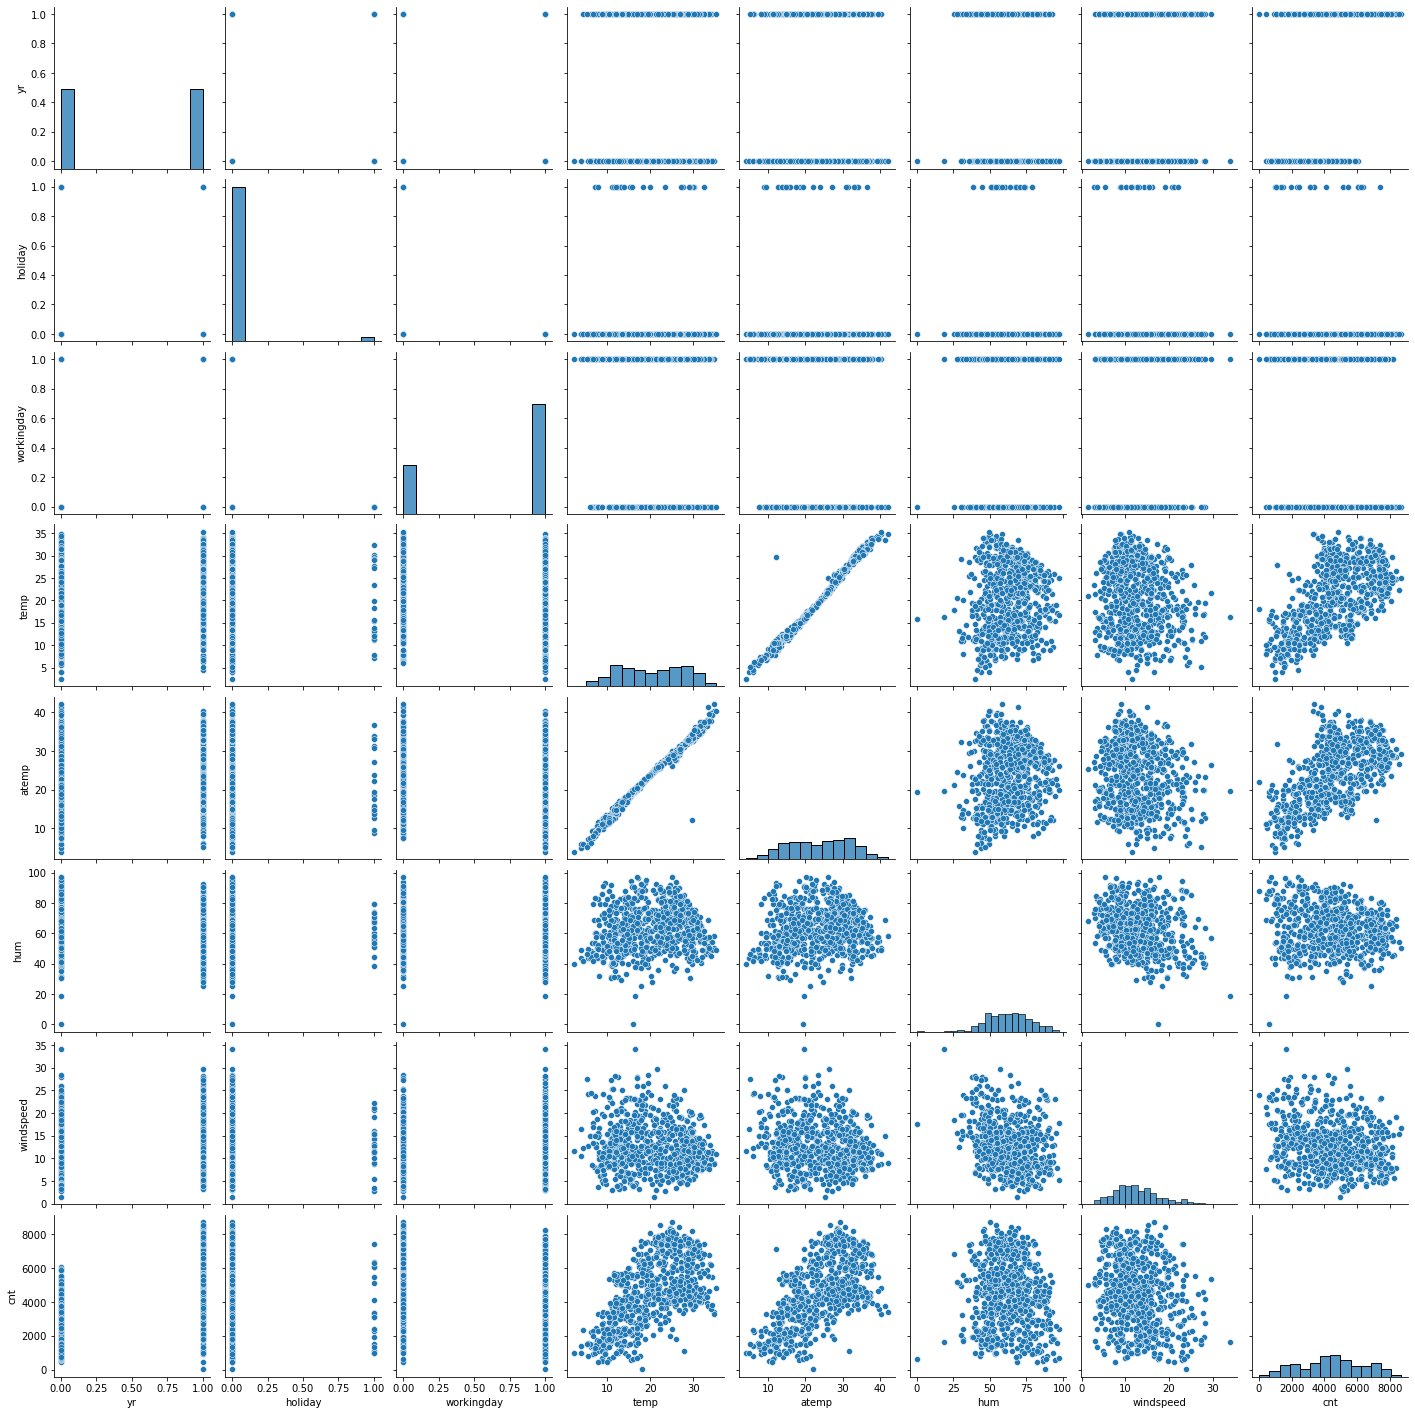

In [29]:
sns.pairplot(day)
plt.show()

**visualizing categorical variables**

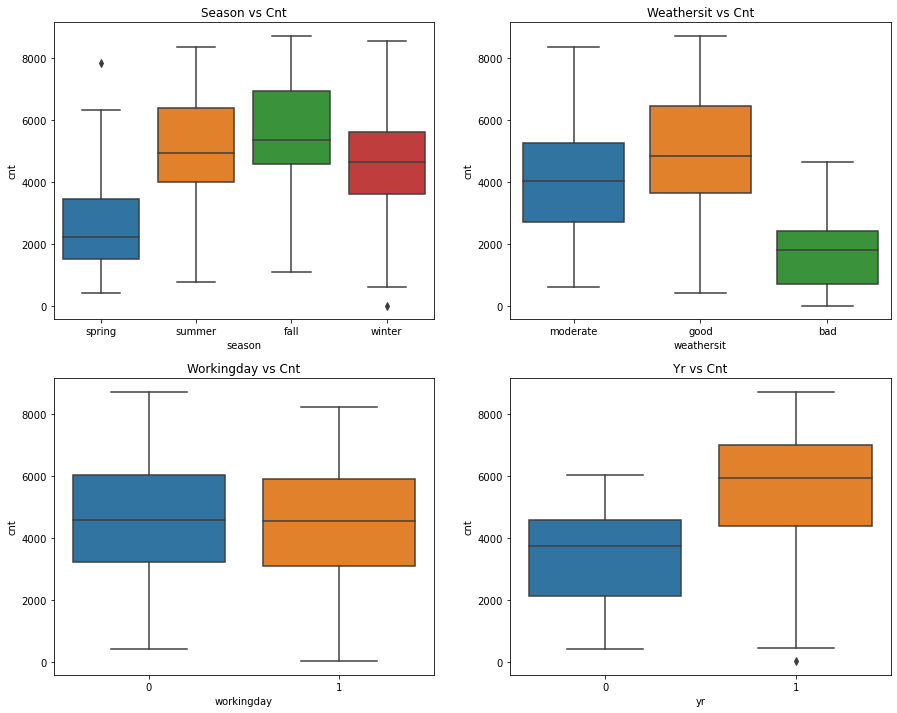

In [30]:
# Boxplots
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
plt.title("Season vs Cnt")
sns.boxplot(x='season', y='cnt', data=day)

plt.subplot(2,2,2)
plt.title("Weathersit vs Cnt")
sns.boxplot(x='weathersit', y='cnt', data=day)

plt.subplot(2,2,3)
plt.title("Workingday vs Cnt")
sns.boxplot(x='workingday', y='cnt', data=day)

plt.subplot(2,2,4)
plt.title("Yr vs Cnt")
sns.boxplot(x='yr', y='cnt', data=day)

plt.show()

- `Fall` season has witness max median number of rented bikes.
- `Good` (clear+few clouds) weathersit has witness max median number of rented bikes.
- `2019` has witnessed increase in the median number of rented bikes

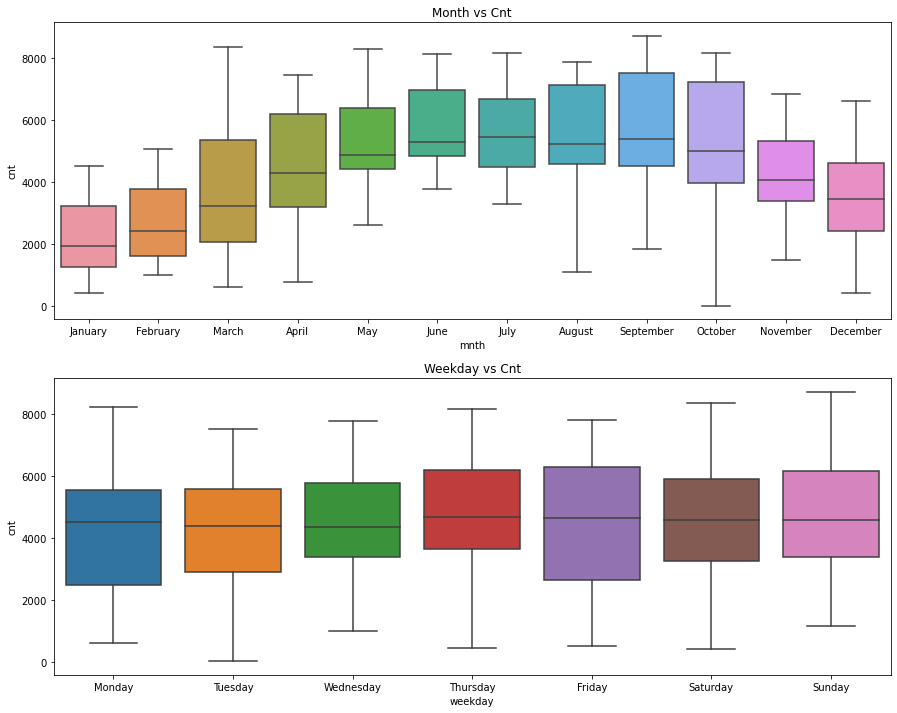

In [31]:
plt.figure(figsize=(15,12))

plt.subplot(2,1,1)
plt.title("Month vs Cnt")
sns.boxplot(x='mnth', y='cnt', data=day)

plt.subplot(2,1,2)
plt.title("Weekday vs Cnt")
sns.boxplot(x='weekday', y='cnt', data=day)

plt.show()

- `July` month has observed more median number of rented bikes
- `Thursday` has observed more median number of rented bikes

**Looking correlations**

In [32]:
cor = day.corr()
cor

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640
temp,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000


**correlation using heat map for numerical continuous variables**

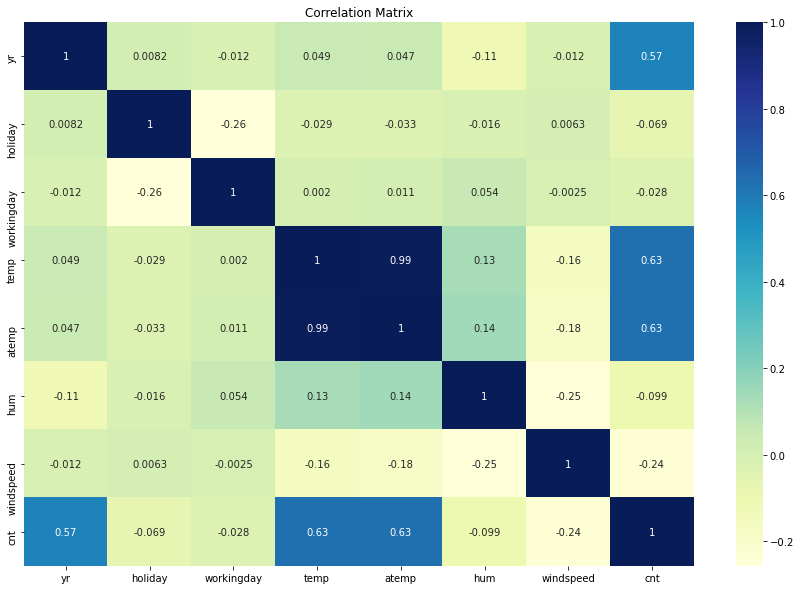

In [33]:
plt.figure(figsize=(15,10))
plt.title("Correlation Matrix")
sns.heatmap(cor, cmap='YlGnBu', annot=True)
plt.show()

- Here, we can observe that `yr, atemp, temp` have good correlation with `cnt`.

**subplots of above correlations**

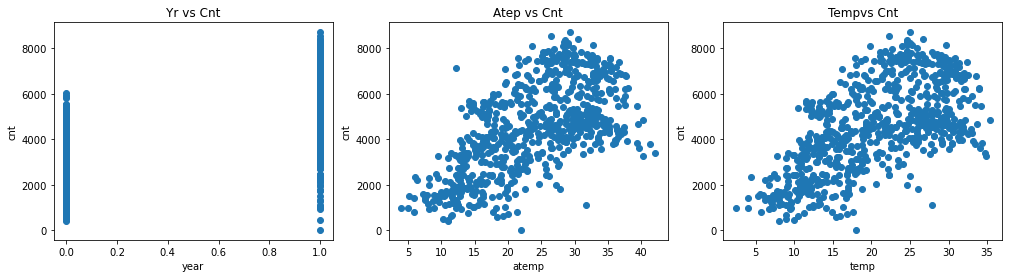

In [34]:
plt.figure(figsize=(17,4))

plt.subplot(1,3,1)
plt.title("Yr vs Cnt")
plt.xlabel("year")
plt.ylabel("cnt")
plt.scatter(day.yr,day.cnt)

plt.subplot(1,3,2)
plt.title("Atep vs Cnt")
plt.xlabel("atemp")
plt.ylabel("cnt")
plt.scatter(day.atemp,day.cnt)

plt.subplot(1,3,3)
plt.title("Tempvs Cnt")
plt.xlabel("temp")
plt.ylabel("cnt")
plt.scatter(day.temp,day.cnt)

plt.show()

### Generating Dummy

**dummy for `season`**

In [35]:
#get dummies
seasons = pd.get_dummies(day['season'])

# check how data looks
print(seasons.head(10))

   fall  spring  summer  winter
0     0       1       0       0
1     0       1       0       0
2     0       1       0       0
3     0       1       0       0
4     0       1       0       0
5     0       1       0       0
6     0       1       0       0
7     0       1       0       0
8     0       1       0       0
9     0       1       0       0


In [36]:
seasons.value_counts()

fall  spring  summer  winter
1     0       0       0         188
0     0       1       0         184
      1       0       0         180
      0       0       1         178
dtype: int64

Now, you don't need four columns. You can drop the `fall` column, as the type of season can be identified with just the last three columns where — 

- `100` will correspond to `spring`
- `010` will correspond to `summer`
- `001` will correspond to `winter`

In [37]:
#Lets drop 1st column from season
seasons = pd.get_dummies(day['season'], drop_first=True)

In [38]:
seasons.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [39]:
# concating dummy with original data
day = pd.concat([day,seasons], axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,January,0,Monday,1,moderate,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,January,0,Tuesday,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,January,0,Wednesday,1,good,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,January,0,Thursday,1,good,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,January,0,Friday,1,good,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [40]:
# dropping season
day = day.drop(['season'], axis=1)
day.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,January,0,Monday,1,moderate,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,January,0,Tuesday,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,January,0,Wednesday,1,good,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,January,0,Thursday,1,good,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,January,0,Friday,1,good,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


**Creating dummy for `weathersit`**

In [41]:
weather = pd.get_dummies(day['weathersit'])

# looking data
print(weather.head())

   bad  good  moderate
0    0     0         1
1    0     0         1
2    0     1         0
3    0     1         0
4    0     1         0


In [42]:
weather.value_counts()

bad  good  moderate
0    1     0           463
     0     1           246
1    0     0            21
dtype: int64

Now, you don't need three columns. You can drop the `bad` column, as the type of weather can be identified with just the last two columns where — 
- `01` will correspond to `moderate`
- `10` will correspond to `good`

In [43]:
# lets drop the first column
weather = pd.get_dummies(day['weathersit'], drop_first=True)

In [44]:
weather.head()

,good,moderate
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [45]:
# concating dummy variable with the original
day = pd.concat([day,weather],axis=1)
day.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,good,moderate
0,0,January,0,Monday,1,moderate,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,January,0,Tuesday,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,January,0,Wednesday,1,good,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0
3,0,January,0,Thursday,1,good,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,1,0
4,0,January,0,Friday,1,good,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,1,0


In [46]:
# droppin weathersit
day = day.drop(['weathersit'], axis=1)
day.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,good,moderate
0,0,January,0,Monday,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,January,0,Tuesday,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,January,0,Wednesday,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0
3,0,January,0,Thursday,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,1,0
4,0,January,0,Friday,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,1,0


**dummy for `mnth`**

In [47]:
month = pd.get_dummies(day['mnth'])
print(month.head())

   April  August  December  February  January  July  June  March  May  \
0      0       0         0         0        1     0     0      0    0   
1      0       0         0         0        1     0     0      0    0   
2      0       0         0         0        1     0     0      0    0   
3      0       0         0         0        1     0     0      0    0   
4      0       0         0         0        1     0     0      0    0   

   November  October  September  
0         0        0          0  
1         0        0          0  
2         0        0          0  
3         0        0          0  
4         0        0          0  


In [48]:
# lets drop the first column
month = pd.get_dummies(day['mnth'], drop_first=True)
print(month.head())

   August  December  February  January  July  June  March  May  November  \
0       0         0         0        1     0     0      0    0         0   
1       0         0         0        1     0     0      0    0         0   
2       0         0         0        1     0     0      0    0         0   
3       0         0         0        1     0     0      0    0         0   
4       0         0         0        1     0     0      0    0         0   

   October  September  
0        0          0  
1        0          0  
2        0          0  
3        0          0  
4        0          0  


In [49]:
# concate dummy with original data set.
day = pd.concat([day,month], axis=True)
day.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,...,December,February,January,July,June,March,May,November,October,September
0,0,January,0,Monday,1,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,January,0,Tuesday,1,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,January,0,Wednesday,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,January,0,Thursday,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,January,0,Friday,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [50]:
# dropping mnth column

day = day.drop(['mnth'], axis=1)
day.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,December,February,January,July,June,March,May,November,October,September
0,0,0,Monday,1,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Tuesday,1,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Wednesday,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Thursday,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Friday,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


**dummy for `weekday` column**

In [51]:
week_day = pd.get_dummies(day['weekday'])
week_day.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0


In [52]:
# dropping first_column
week_day = pd.get_dummies(day['weekday'], drop_first=True)
week_day.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [53]:
# concate dummy with original dataset

day = pd.concat([day,week_day], axis=1)
day.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,Monday,1,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,Tuesday,1,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,Wednesday,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,Thursday,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,Friday,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# drop weekday

day = day.drop(['weekday'], axis=1)
day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# checking data types
day.dtypes

yr              int64
holiday         int64
workingday      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
spring          uint8
summer          uint8
winter          uint8
good            uint8
moderate        uint8
August          uint8
December        uint8
February        uint8
January         uint8
July            uint8
June            uint8
March           uint8
May             uint8
November        uint8
October         uint8
September       uint8
Monday          uint8
Saturday        uint8
Sunday          uint8
Thursday        uint8
Tuesday         uint8
Wednesday       uint8
dtype: object

In [56]:
# names of all the columns
day.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'good', 'moderate', 'August',
       'December', 'February', 'January', 'July', 'June', 'March', 'May',
       'November', 'October', 'September', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

## Splitting data into train and test set

**importing library**

In [57]:
import sklearn
from sklearn.model_selection import train_test_split

In [58]:
np.random.seed(0)
# We specify this so that the train and test dataset always have same rows, respectively

df_train, df_test = train_test_split(day, train_size=0.7, test_size=0.3, random_state=100)

In [59]:
#checking dimensions
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Rescaling the features

- We'll use `MinMax Scaling`

**importing library**

In [60]:
from sklearn.preprocessing import MinMaxScaler

**instantiate the scaler**

In [61]:
scaler = MinMaxScaler()

In [62]:
day.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'good', 'moderate', 'August',
       'December', 'February', 'January', 'July', 'June', 'March', 'May',
       'November', 'October', 'September', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

**apply scaler and fit data**

In [63]:
# apply scaler to columns
num_vars = ['temp','atemp','hum','windspeed','cnt']

# fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,1,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,1,0,0,0


In [64]:
# to verify that values are between 0 & 1
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


## Building Model

- Using **`RFE (Recursive feature elimination)`**
- `Linear Regression`

**importing library**

In [65]:
# importing from sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

**Diving X and Y for modeling**

In [66]:
y_train = df_train.pop('cnt')
X_train = df_train

In [67]:
# Running RFE with output no of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

# Specify the number of features you want to select
num_features_to_select = 15

# Initialize RFE with the Linear Regression model and the number of features to select
rfe = RFE(estimator=lm, n_features_to_select=num_features_to_select)

# Fit RFE to the data
rfe.fit(X_train, y_train)


RFE(estimator=LinearRegression(), n_features_to_select=15)

In [68]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('good', True, 1),
 ('moderate', True, 1),
 ('August', False, 10),
 ('December', True, 1),
 ('February', False, 2),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('March', False, 15),
 ('May', False, 7),
 ('November', True, 1),
 ('October', False, 12),
 ('September', True, 1),
 ('Monday', False, 9),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 13),
 ('Tuesday', False, 8),
 ('Wednesday', False, 11)]

**features selected by `RFE`**

In [69]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'good', 'moderate', 'December', 'January', 'July', 'November',
       'September'],
      dtype='object')

**features not selected by `RFE`**

In [70]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'August', 'February', 'June', 'March', 'May',
       'October', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

### Building using Stats model for detailed statistics

**`Model 1`**

In [71]:
# creating X_train dataframe with RFE selected features
X_train_rfe = X_train[col] 

In [72]:
# importing library
import statsmodels.api as sm

In [73]:
# adding constant
X_train_rfe = sm.add_constant(X_train_rfe)

# creating model and fitting model
lr1 = sm.OLS(y_train, X_train_rfe).fit()

# parameters
lr1.params

const        0.072127
yr           0.230328
holiday     -0.091228
temp         0.479977
hum         -0.160227
windspeed   -0.188457
spring      -0.061737
summer       0.040767
winter       0.103435
good         0.248116
moderate     0.192240
December    -0.037199
January     -0.043748
July        -0.055495
November    -0.040949
September    0.074891
dtype: float64

In [74]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          3.34e-189
Time:                        13:22:49   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.047      1.519      0.1

In [75]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,143.19
9,good,10.34
10,moderate,8.93
6,spring,5.27
3,temp,4.42
8,winter,3.83
7,summer,2.76
4,hum,1.93
14,November,1.76
12,January,1.68


- Dropping `good` as it is `insignificant` as it have very high VIF value.

**Model 2**

- Updating and rebuilding model without `good`

In [76]:
X_train2 = X_train_rfe.drop(['good'], axis=1)

In [77]:
# adding a constant variable
X_train_lm2 = sm.add_constant(X_train2)
# fitting model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
# parameters
lr2.params

const        0.366447
yr           0.230735
holiday     -0.082534
temp         0.537960
hum         -0.302405
windspeed   -0.234604
spring      -0.045291
summer       0.052369
winter       0.106721
moderate    -0.023403
December    -0.018644
January     -0.031111
July        -0.062178
November    -0.028039
September    0.076179
dtype: float64

In [79]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     158.7
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          9.54e-173
Time:                        13:23:29   Log-Likelihood:                 472.75
No. Observations:                 510   AIC:                            -915.5
Df Residuals:                     495   BIC:                            -852.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3664      0.039      9.463      0.0

In [80]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,80.95
6,spring,5.24
3,temp,4.30
8,winter,3.82
7,summer,2.75
13,November,1.75
11,January,1.67
4,hum,1.62
12,July,1.49
10,December,1.48


- Dropping `December` feature as it is insignificant since it has very high p-value.

**Model 3**

- Updating and rebuilding model without `December`

In [81]:
X_train3 = X_train_lm2.drop(['December'], axis=1)

In [82]:
# adding constant
X_train_lm3 = sm.add_constant(X_train3)

# fiiting model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# parameters
lr3.params

const        0.357117
yr           0.230624
holiday     -0.083140
temp         0.550026
hum         -0.304604
windspeed   -0.232446
spring      -0.042787
summer       0.055197
winter       0.104230
moderate    -0.023027
January     -0.026289
July        -0.062459
November    -0.020256
September    0.078647
dtype: float64

In [84]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     170.9
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          1.16e-173
Time:                        13:24:07   Log-Likelihood:                 472.24
No. Observations:                 510   AIC:                            -916.5
Df Residuals:                     496   BIC:                            -857.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3571      0.038      9.507      0.0

In [85]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,76.16
6,spring,5.17
3,temp,3.89
8,winter,3.76
7,summer,2.66
4,hum,1.61
10,January,1.57
11,July,1.49
12,November,1.48
9,moderate,1.40


- Dropping `November` feature as it is insignificant since it have very high p-value.

**Model 4**

- Updating and Rebuilding model without `November`

In [86]:
X_train4 = X_train3.drop(['November'], axis=1)

In [87]:
# model building
X_train_lm4 = sm.add_constant(X_train4)

# fitting model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# parameters
lr4.params

const        0.351021
yr           0.230588
holiday     -0.086876
temp         0.555822
hum         -0.302722
windspeed   -0.233618
spring      -0.039161
summer       0.057130
winter       0.099770
moderate    -0.023009
January     -0.025660
July        -0.062196
September    0.080813
dtype: float64

In [89]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     185.0
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          1.50e-174
Time:                        13:24:40   Log-Likelihood:                 471.64
No. Observations:                 510   AIC:                            -917.3
Df Residuals:                     497   BIC:                            -862.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3510      0.037      9.450      0.0

In [90]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.46
6,spring,5.06
3,temp,3.81
8,winter,3.59
7,summer,2.63
4,hum,1.61
10,January,1.56
11,July,1.49
9,moderate,1.40
12,September,1.30


- Dropping `January` feature as it has high p-value and is insignificant.

**Model 5**

- Updating and Rebuilding model without `January`

In [91]:
X_train5 = X_train4.drop(['January'], axis=1)

In [92]:
# creating model
X_train_lm5 = sm.add_constant(X_train5)

# fit
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# parameters
lr5.params

const        0.341610
yr           0.230016
holiday     -0.087409
temp         0.568967
hum         -0.305194
windspeed   -0.229262
spring      -0.042717
summer       0.059287
winter       0.104122
moderate    -0.023279
July        -0.063402
September    0.081256
dtype: float64

In [93]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     201.3
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          2.57e-175
Time:                        13:24:52   Log-Likelihood:                 470.70
No. Observations:                 510   AIC:                            -917.4
Df Residuals:                     498   BIC:                            -866.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3416      0.037      9.354      0.0

In [94]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,71.85
6,spring,4.99
3,temp,3.55
8,winter,3.49
7,summer,2.61
4,hum,1.60
10,July,1.48
9,moderate,1.40
11,September,1.30
5,windspeed,1.14


- Dropping `spring` feature as it is insignificantc since it have high p-value. 

**Model 6**

- Updating and Rebuilding model without `spring`

In [95]:
X_train6 = X_train5.drop(['spring'], axis=1)

In [96]:
# model
X_train_lm6 = sm.add_constant(X_train6)

# fit
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# parameters
lr6.params

const        0.296091
yr           0.228934
holiday     -0.089111
temp         0.620036
hum         -0.311801
windspeed   -0.234044
summer       0.080850
winter       0.132264
moderate    -0.021893
July        -0.056116
September    0.091132
dtype: float64

In [97]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     219.9
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          1.02e-175
Time:                        13:25:19   Log-Likelihood:                 468.85
No. Observations:                 510   AIC:                            -915.7
Df Residuals:                     499   BIC:                            -869.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2961      0.028     10.699      0.0

In [98]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,41.04
4,hum,1.59
3,temp,1.58
9,July,1.43
8,moderate,1.39
6,summer,1.33
7,winter,1.28
10,September,1.19
5,windspeed,1.13
1,yr,1.03


- All the features are significant now, dropping const feature.

In [99]:
X_train6 = X_train6.drop(['const'], axis=1)

**Calculate the VIFs for the model after dropping 'const'**

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,13.54
2,temp,9.84
4,windspeed,3.56
0,yr,2.01
7,moderate,1.98
5,summer,1.76
6,winter,1.70
8,July,1.54
9,September,1.28
1,holiday,1.04


- Dropping `hum` as it has unexptedly high VIF value.

**Model 7**

- Updating and Rebuilding model without `hum`.

In [101]:
X_train7 = X_train6.drop(['hum'], axis=1)

In [102]:
# model
X_train_lm7 = sm.add_constant(X_train7)

# fit
lr7 = sm.OLS(y_train, X_train_lm7).fit()

# parameters
lr7.params

# summary
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     208.1
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          8.29e-163
Time:                        13:25:54   Log-Likelihood:                 435.58
No. Observations:                 510   AIC:                            -851.2
Df Residuals:                     500   BIC:                            -808.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1183      0.019      6.288      0.0

In [103]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.06
3,windspeed,3.02
0,yr,2.00
4,summer,1.75
7,July,1.52
6,moderate,1.46
5,winter,1.43
8,September,1.28
1,holiday,1.03


- Now all the features are significant within the permissible limit of `VIF` and `p-value`.

## Residual Anaylsis on train data

checking if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), plotting the histogram of the error terms and see what it looks like.

In [104]:
y_train_pred = lr7.predict(X_train_lm7)

In [105]:
res = (y_train - y_train_pred)

**looking at the distribution of error terms**

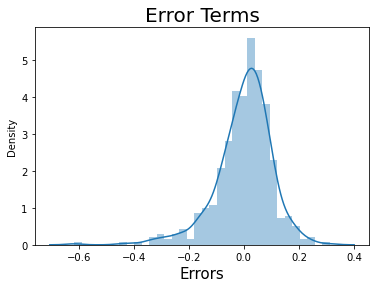

In [106]:
# histogram for error terms

sns.distplot((y_train - y_train_pred))
plt.title('Error Terms', fontsize = 20)                
plt.xlabel("Errors", fontsize = 15)
plt.show()

## Making Predictions

**Applying scaling on test**

In [107]:
num_vars = ['temp', 'atemp','hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

**dividing into X_test, y_test**

In [108]:
y_test = df_test.pop('cnt')
X_test = df_test

In [109]:
# adding constant
X_test_new = sm.add_constant(X_test)

X_test_new.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,0,0,0,0,0,0,0,0,0,1
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,...,0,0,0,0,0,0,0,1,0,0
299,1.0,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,...,0,0,1,0,0,1,0,0,0,0
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,...,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,0,0.817246,0.741471,0.314298,0.537414,0,1,...,0,0,0,0,0,1,0,0,0,0


**# Creating X_test_new dataframe by dropping variables from X_test**

In [110]:
X_test_new = X_test_new.drop(['good','December','November','January','spring', 'workingday', 'atemp', 'August', 'February',
                          'June', 'March', 'May', 'October', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
                          'Wednesday','hum'], axis=1)

In [111]:
# making predictions

y_pred_new = lr7.predict(X_test_new)

## Model Evaluation

In [112]:
# importing library
from sklearn.metrics import r2_score

In [113]:
# evaluate
r2_score(y_true = y_test, y_pred = y_pred_new)

0.7681523111733861

- R2_score for our **`train`** dataset  was **`0.78`** and for **`test`** it is **`0.768` =~ `0.77`**, which are close enough to each other therefore our model is `good` and `significant`

**Linearity Check**

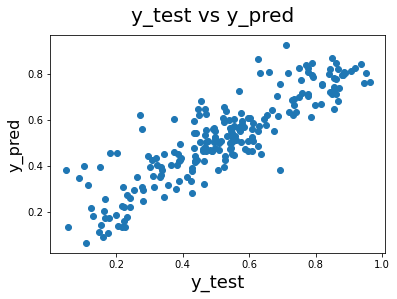

In [114]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_new)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)
plt.show()

___
So, the equation of our best fitted line is:

$ cnt = 0.2378  \times  yr - 0.0869  \times  holiday + 0.5738 \times temp - 0.1824 \times windspeed + 0.0783 \times summer (season) + 0.1120 \times winter(season) - 0.0677 \times moderate (Mist + Cloudy) - 0.0445 \times July (month) + 0.0806 \times September (month) $
___

**Significant variables in predicting the demand for shared bikes are:**

In [116]:
print(lr7.params)

const        0.118348
yr           0.237775
holiday     -0.086852
temp         0.573840
windspeed   -0.182439
summer       0.078322
winter       0.112010
moderate    -0.067652
July        -0.044519
September    0.080596
dtype: float64


                                               **The End**